In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
movies_v2 = pd.read_csv('/content/drive/My Drive/bertmodel/tmdb_5000_movies.csv')  
credits_v2 = pd.read_csv('/content/drive/My Drive/bertmodel/tmdb_5000_credits.csv')
movies_v2 = movies_v2.merge(credits_v2,on='title')


movies_clean = movies_v2[['title','keywords','cast','popularity','overview','genres']]
movies_clean.dropna(inplace=True)
movies_clean.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,keywords,cast,popularity,overview,genres
0,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",112.312950,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",43.926995,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [ ]:
def convert_1(text):
    arr = []
    for i in ast.literal_eval(text):
            arr.append(i['name'])
    return arr

movies_clean['genres'] = movies_v2['genres'].apply(convert_1)

movies_clean['genres'] = movies_clean['genres'].apply(lambda x: ", ".join(x))


movies_summary = movies_clean[['title','overview','genres']]
movies_summary = movies_summary.dropna(subset=['title','overview','genres'])

movies_summary.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","Adventure, Fantasy, Action"
2,Spectre,A cryptic message from Bond’s past sends him o...,"Action, Adventure, Crime"
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"Action, Crime, Drama, Thriller"
4,John Carter,"John Carter is a war-weary, former military ca...","Action, Adventure, Science Fiction"


In [ ]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

movies_summary['clean_tag'] = movies_summary['overview'].apply(lambda x: clean_text(x))



movies_summary_clean_1 = movies_summary[['title','clean_tag','genres']]

movies_summary_clean_1.head(10)

,title,clean_tag,genres
0,Avatar,in the nd century a paraplegic marine is dispa...,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,"Adventure, Fantasy, Action"
2,Spectre,a cryptic message from bond s past sends him o...,"Action, Adventure, Crime"
3,The Dark Knight Rises,following the death of district attorney harve...,"Action, Crime, Drama, Thriller"
4,John Carter,john carter is a war weary former military cap...,"Action, Adventure, Science Fiction"
5,Spider-Man 3,the seemingly invincible spider man goes up ag...,"Fantasy, Action, Adventure"
6,Tangled,when the kingdoms most wanted and most charmin...,"Animation, Family"
7,Avengers: Age of Ultron,when tony stark tries to jumpstart a dormant p...,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,as harry begins his sixth year at hogwarts he ...,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,fearing the actions of a god like super hero l...,"Action, Adventure, Fantasy"


In [ ]:
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)

movies_summary_clean_1['genres']=movies_summary_clean_1['genres'].apply(remove_spaces)
movies_summary_clean_1['genres']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0       Action,Adventure,Fantasy,Science Fiction
1                       Adventure,Fantasy,Action
2                         Action,Adventure,Crime
3                    Action,Crime,Drama,Thriller
4               Action,Adventure,Science Fiction
                          ...                   
4804                       Action,Crime,Thriller
4805                              Comedy,Romance
4806               Comedy,Drama,Romance,TV Movie
4807                                            
4808                                 Documentary
Name: genres, Length: 4806, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movies_summary_clean_1)

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train_text = train['genres']
y_train = vectorizer.fit_transform(train['genres']).toarray()
y_test = vectorizer.transform(test['genres']).toarray()
print(y_train)

y_train[0]

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_train_text[0]

'Action,Adventure,Fantasy,Science Fiction'

In [ ]:
y_train_text.value_counts()


Drama                                      278
Comedy                                     225
Drama,Romance                              126
Comedy,Romance                             110
Comedy,Drama                               106
                                          ... 
Action,Crime,Comedy                          1
Mystery,Drama,Adventure                      1
Horror,Drama,Science Fiction                 1
Crime,Comedy,Adventure                       1
Science Fiction,Animation,Comedy,Family      1
Name: genres, Length: 980, dtype: int64

In [ ]:
train['genres']

22                     Adventure,Fantasy
2724                Comedy,Drama,Romance
2739                     Horror,Thriller
4072                         Drama,Crime
4366                      Drama,Thriller
                      ...               
2888               Drama,Horror,Thriller
39      Adventure,Action,Science Fiction
3659                        Comedy,Drama
2433                              Family
3108                               Drama
Name: genres, Length: 3604, dtype: object

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten

In [ ]:
test

,title,clean_tag,genres
3848,Evil Dead II,ash williams and his girlfriend linda find a l...,"Horror,Comedy,Fantasy"
44,Furious 7,deckard shaw seeks revenge against dominic tor...,Action
2102,The Conjuring,paranormal investigators ed and lorraine warre...,"Horror,Thriller"
2939,Invaders from Mars,in this remake of the classic s sf tale a boy ...,Science Fiction
153,Mission: Impossible - Ghost Protocol,in the th installment of the mission impossibl...,"Action,Thriller,Adventure"
...,...,...,...
4586,Quinceañera,as magdalenas th birthday approaches her simpl...,Drama
106,Shrek the Third,the king of far far away has died and shrek an...,"Fantasy,Adventure,Animation,Comedy,Family"
3161,Red Dog,based on the legendary true story of the red d...,"Drama,Comedy,Family"
2778,The Widow of Saint-Pierre,in on the isolated french island of saint pier...,"Romance,Drama"


In [ ]:
train['clean_tag'][0]

'in the nd century a paraplegic marine is dispatched to the moon pandora on a unique mission but becomes torn between following orders and protecting an alien civilization'

In [ ]:
max_features = 20000 # this is the number of words we care about


vect=Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
vect.fit_on_texts(train['clean_tag'])
vocab_size = len(vect.word_index) + 1
print(vocab_size)

18625


In [ ]:
encoded_docs_train = vect.texts_to_sequences(train['clean_tag'])
max_length = vocab_size
vocab_size

18625

In [ ]:
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=175, padding='post')
print(padded_docs_train)

[[   7   45  665 ...    0    0    0]
 [7021  372   28 ...    0    0    0]
 [  48 5420  666 ...    0    0    0]
 ...
 [7536    9 1244 ...    0    0    0]
 [  19    8   46 ...    0    0    0]
 [   7    2 1698 ...    0    0    0]]


In [ ]:
padded_docs_train[0]

array([    7,    45,   665,     3,   471,  1814,   573,     5,    14,
         953,  7019,  2334,     2,   495,    10,     3,    38,   484,
        3315,     4,  3790,     3,  1815,    82,  2926,   137,   722,
        5417,  1098,    10,   141,     6,     2,   507,    45,   115,
         841,  1964,     2,   102,  4448,   186,    15,    17,    71,
           7,     2,  1099,     6,  1053,     5,   881,  3316,    21,
          14,  5418,   911,     5,  1224,    21,  2588,   216,     2,
         912,     6,   842,    45, 10026,  5419,   912,     5,   408,
          31,     3,  1474,  7020,    16,  3317,     3,  3791,   625,
           7,   954,  1225,    79,   665,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

## Multi-Label Text Classification with BERT Langauge Model 

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 35.2 MB/s 
     |████████████████████████████████| 511.8 MB 10 kB/s 
     |████████████████████████████████| 1.6 MB 43.6 MB/s 
     |████████████████████████████████| 5.8 MB 85.5 MB/s 
     |████████████████████████████████| 438 kB 73.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
train['clean_tag']

587     a civilian oil rig crew is recruited to conduc...
4137    after serving time in prison former drug addic...
2905    in five years after the gamilons began an inva...
3493    a dentist finds himself a murder suspect after...
1084    a young couple living in a connecticut suburb ...
                              ...                        
4516    tilen an attractive high school student swears...
1175    in the antarctic after an expedition with dr d...
3749    theres a deadly zombie epidemic threatening hu...
2482    a teenager journeys through a series of foster...
4665    what s the matter with kathy jordan trovillion...
Name: clean_tag, Length: 3604, dtype: object

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
import tensorflow_text as text

In [ ]:
# loading of BERT Base preprocessing and encoder model from tenserflow hub 

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# visualization of text transformation with BERT preprocessing on training set

text_preprocessed_train = bert_preprocess(train['clean_tag'])

text_preprocessed_train.keys()

text_preprocessed_train

{'input_word_ids': <tf.Tensor: shape=(3604, 128), dtype=int32, numpy=
 array([[  101,  2035, 29475, ...,     0,     0,     0],
        [  101,  1996,  2158, ...,     0,     0,     0],
        [  101,  2019,  9577, ...,     0,     0,     0],
        ...,
        [  101,  1996,  2569, ...,     0,     0,     0],
        [  101,  1996,  2466, ...,     0,     0,     0],
        [  101,  2924, 27307, ...,     0,     0,     0]], dtype=int32)>,
 'input_mask': <tf.Tensor: shape=(3604, 128), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(3604, 128), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, 

Creation of BERT Layers and Neural Networks layers 

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(21, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics = METRICS)

Training with default parameters 

In [ ]:
hist = model.fit(train['clean_tag'], y_train, epochs=5, verbose = 1, validation_split = 0.1)

Epoch 1/5
102/102 [==============================] - 1666s 16s/step - loss: 0.4551 - tp: 2308.0000 - fp: 7411.0000 - tn: 52448.0000 - fn: 5936.0000 - accuracy: 0.8040 - precision: 0.2375 - recall: 0.2800 - auc: 0.6725 - val_loss: 0.3407 - val_tp: 72.0000 - val_fp: 103.0000 - val_tn: 6573.0000 - val_fn: 833.0000 - val_accuracy: 0.8765 - val_precision: 0.4114 - val_recall: 0.0796 - val_auc: 0.7513
Epoch 2/5
102/102 [==============================] - 1625s 16s/step - loss: 0.3275 - tp: 797.0000 - fp: 994.0000 - tn: 58865.0000 - fn: 7447.0000 - accuracy: 0.8761 - precision: 0.4450 - recall: 0.0967 - auc: 0.7647 - val_loss: 0.3225 - val_tp: 57.0000 - val_fp: 83.0000 - val_tn: 6593.0000 - val_fn: 848.0000 - val_accuracy: 0.8772 - val_precision: 0.4071 - val_recall: 0.0630 - val_auc: 0.7653
Epoch 3/5
102/102 [==============================] - 1564s 15s/step - loss: 0.3177 - tp: 772.0000 - fp: 897.0000 - tn: 58962.0000 - fn: 7472.0000 - accuracy: 0.8771 - precision: 0.4626 - recall: 0.0936 - a

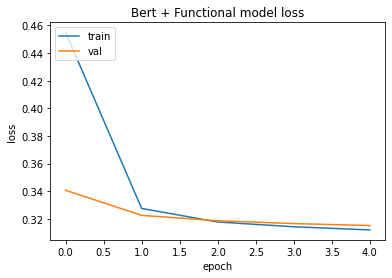

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Bert + Functional model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test['clean_tag'], y_test)

38/38 [==============================] - 547s 14s/step - loss: 0.3050 - tp: 256.0000 - fp: 212.0000 - tn: 21977.0000 - fn: 2797.0000 - accuracy: 0.8808 - precision: 0.5470 - recall: 0.0839 - auc: 0.7982


[0.3049566149711609,
 256.0,
 212.0,
 21977.0,
 2797.0,
 0.8807939291000366,
 0.5470085740089417,
 0.08385194838047028,
 0.7981988787651062]

Model training with SGD optimizer tuning

In [ ]:
#Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
layer_1 = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
layer_2 = tf.keras.layers.Dense(21, activation='sigmoid', name="output")(layer_1)

# Final model with input and outputs defined from tasks above
model_1 = tf.keras.Model(inputs=[text_input], outputs = [layer_2])



In [ ]:
tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.9, nesterov=False, name="sgd"
)

model_1.compile(optimizer='sgd', loss="binary_crossentropy", metrics = METRICS)

hist1 = model_1.fit(train['clean_tag'], y_train, epochs=10, verbose = 1, validation_split = 0.1)



Epoch 1/10
102/102 [==============================] - 1029s 10s/step - loss: 0.4312 - tp: 1031.0000 - fp: 4489.0000 - tn: 55408.0000 - fn: 7175.0000 - accuracy: 0.8287 - precision: 0.1868 - recall: 0.1256 - auc: 0.6517 - val_loss: 0.3412 - val_tp: 91.0000 - val_fp: 125.0000 - val_tn: 6507.0000 - val_fn: 858.0000 - val_accuracy: 0.8703 - val_precision: 0.4213 - val_recall: 0.0959 - val_auc: 0.7581
Epoch 2/10
102/102 [==============================] - 1024s 10s/step - loss: 0.3300 - tp: 842.0000 - fp: 1269.0000 - tn: 58628.0000 - fn: 7364.0000 - accuracy: 0.8732 - precision: 0.3989 - recall: 0.1026 - auc: 0.7559 - val_loss: 0.3251 - val_tp: 95.0000 - val_fp: 118.0000 - val_tn: 6514.0000 - val_fn: 854.0000 - val_accuracy: 0.8718 - val_precision: 0.4460 - val_recall: 0.1001 - val_auc: 0.7748
Epoch 3/10
102/102 [==============================] - 1036s 10s/step - loss: 0.3198 - tp: 886.0000 - fp: 1158.0000 - tn: 58739.0000 - fn: 7320.0000 - accuracy: 0.8755 - precision: 0.4335 - recall: 0.10

In [ ]:

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Bert + Functional model (sgd tuning) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

NameError: ignored

Model training using Adam optimizer with learning rates of 0.0001 and default parameters 

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(21, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_l = tf.keras.Model(inputs=[text_input], outputs = [l])

model_1.compile(optimizer=opt , loss="binary_crossentropy", metrics = METRICS)

hist2 = model_1.fit(train['clean_tag'], y_train, epochs=10, verbose = 1, validation_split = 0.1)


Epoch 1/10
102/102 [==============================] - 1031s 10s/step - loss: 0.3075 - tp: 933.0000 - fp: 985.0000 - tn: 65544.0000 - fn: 8222.0000 - accuracy: 0.8783 - precision: 0.4864 - recall: 0.1019 - auc: 0.7915 - val_loss: 0.3078 - val_tp: 116.0000 - val_fp: 69.0000 - val_tn: 6563.0000 - val_fn: 833.0000 - val_accuracy: 0.8810 - val_precision: 0.6270 - val_recall: 0.1222 - val_auc: 0.8012
Epoch 2/10
102/102 [==============================] - 1036s 10s/step - loss: 0.3030 - tp: 890.0000 - fp: 831.0000 - tn: 59066.0000 - fn: 7316.0000 - accuracy: 0.8804 - precision: 0.5171 - recall: 0.1085 - auc: 0.7979 - val_loss: 0.3049 - val_tp: 103.0000 - val_fp: 56.0000 - val_tn: 6576.0000 - val_fn: 846.0000 - val_accuracy: 0.8810 - val_precision: 0.6478 - val_recall: 0.1085 - val_auc: 0.8059
Epoch 3/10
102/102 [==============================] - 1025s 10s/step - loss: 0.2999 - tp: 967.0000 - fp: 817.0000 - tn: 59080.0000 - fn: 7239.0000 - accuracy: 0.8817 - precision: 0.5420 - recall: 0.1178 -

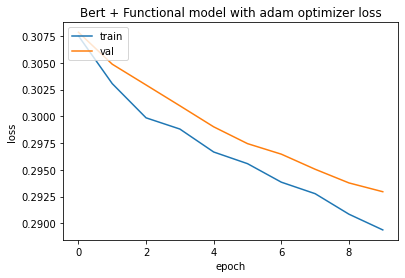

In [ ]:

plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Bert + Functional model with adam optimizer loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:

opt1 = keras.optimizers.Adam(learning_rate=0.01)


# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(21, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_l = tf.keras.Model(inputs=[text_input], outputs = [l])

model_1.compile(optimizer=opt1 , loss="binary_crossentropy", metrics = METRICS)

hist3 = model_1.fit(train['clean_tag'], y_train, epochs=10, verbose = 1, validation_split = 0.1)


Epoch 1/10
102/102 [==============================] - 1025s 10s/step - loss: 0.3117 - tp: 2055.0000 - fp: 1830.0000 - tn: 64699.0000 - fn: 7100.0000 - accuracy: 0.8820 - precision: 0.5290 - recall: 0.2245 - auc: 0.8064 - val_loss: 0.2939 - val_tp: 289.0000 - val_fp: 198.0000 - val_tn: 6434.0000 - val_fn: 660.0000 - val_accuracy: 0.8868 - val_precision: 0.5934 - val_recall: 0.3045 - val_auc: 0.8299
Epoch 2/10
102/102 [==============================] - 1017s 10s/step - loss: 0.2774 - tp: 2363.0000 - fp: 1694.0000 - tn: 58203.0000 - fn: 5843.0000 - accuracy: 0.8893 - precision: 0.5825 - recall: 0.2880 - auc: 0.8482 - val_loss: 0.2750 - val_tp: 274.0000 - val_fp: 151.0000 - val_tn: 6481.0000 - val_fn: 675.0000 - val_accuracy: 0.8910 - val_precision: 0.6447 - val_recall: 0.2887 - val_auc: 0.8610
Epoch 3/10
102/102 [==============================] - 1019s 10s/step - loss: 0.2690 - tp: 2672.0000 - fp: 1828.0000 - tn: 58069.0000 - fn: 5534.0000 - accuracy: 0.8919 - precision: 0.5938 - recall: 

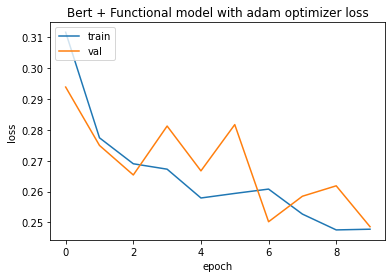

In [ ]:

plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Bert + Functional model with adam optimizer loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()